## Perform a predictive modeling analysis on this breast-cancer dataset 
- (Data: https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data)

### Specifically, build a decision tree, logistic regression and k-nearest neighbors that predicts the diagnose result based on ten real-valued features (mean, standard error, and "worst" or largest of these features).

- Explore how well different model perform for several different parameter values. When is overfitting and when is underfitting? Show how you set the model that provides the best predictive performance.
- Present a brief overview of your predictive modeling process, explorations, and discuss your results. Make sure you present information about the model “goodness” (possible things to think about: confusion matrix, predictive accuracy, classification error, precision, recall, f-measure) using the decision tree, k-NN techniques, logistic regression and SVM (explore how well the model performs for several different hyper-parameter values). 
- Present a brief overview of your predictive modeling process, explorations, and discuss your results. Make sure you present information about the model “goodness” (possible things to think about: confusion matrix, predictive accuracy, precision, recall, f-measure). Briefly discuss ROC and lift curves.

### In this predictive modeling process, I aimed to build Decision Tree, Knn, Logistic Regression and SVM classifer to predict breast cancer outcomes based on the Breast Cancer dataset. I use nested cross-validation to evaluate the model's performance and searched for the optimal hyperparameteer using grid search. Here is a brief overview of the process.

- Data Preparation: I loaded the Breast Cancer dataset, consisting of feature vectors and binary labels, and divided the data into input features (X) and target labels (y).

- Model Selection: I chose Decision Tree, Knn, Logistic Regression and SVM as our classification algorithm.

- Nested Cross-Validation: I implemented a nested cross-validation loop with 10 trials. In each trial, I divided the data into inner and outer folds using K-Fold cross-validation. I performed a grid search for the 'max_depth' hyperparameter within each inner fold and evaluated the model on the outer fold.

- Performance Evaluation: For each trial, I computed and stored various performance metrics, including confusion matrices, precision, recall, and F1-score. I also generated ROC curves to assess model performance.

- Overfitting Detection: To detect overfitting, I compared the accuracy of each trial to the mean accuracy across trials. If a trial's accuracy was significantly higher than the mean, it suggested possible overfitting.

- Mean Performance Metrics: I calculated the mean values of the confusion matrices, precision, recall, and F1-score across all trials.

- Grid Search: I performed a final grid search using the best hyperparameters found during the nested cross-validation process.

- ROC Curve:I plotted the Receiver Operating Characteristic (ROC) curve to visualize the model's performance in terms of true positive rate vs. false positive rate.

- Lift Curve: I created a Lift Curve based on the ROC curve, which helps me understand how well the model performs relative to a random classifier at different threshold levels.

- Best Model Hyperparameters: I printed the best hyperparameters and the corresponding best accuracy achieved during grid search.

In terms of ROC and Lift curves:

- The ROC curve is used to evaluate a binary classifier's ability to discriminate between positive and negative cases at different threshold levels. It plots the true positive rate against the false positive rate, and the area under the ROC curve (AUC) quantifies the overall performance.

- The Lift curve is derived from the ROC curve and shows how much better the model is at identifying positive cases compared to a random classifier at different threshold levels. A Lift value greater than 1 indicates the model's superiority over random guessing.

Overall, the results and performance metrics obtained from this process help assess different model classifier's ability to predict breast cancer outcomes. The ROC and Lift curves provide visual insights into the model's performance across different threshold levels, allowing for better decision-making regarding the model's deployment and tuning.

In [111]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, precision_recall_fscore_support

## Decision Tree Model

In [112]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [113]:
# Define parameter grid for hyperparameters
param_grid_df = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Initialize Decision Tree, K-Fold
dt_classifier = DecisionTreeClassifier(random_state=42)

In [114]:
## Nested Cross validation
num_trials = 10
nested_dt_scores = np.zeros(num_trials)

# initialize lists to store performance matircs
confusion_list = []
precisions = []
recalls = []
f1_scores = []

for i in range(num_trials):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    clf_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_df, cv=inner_cv)
    nested_score_dt = cross_val_score(clf_dt, X=X, y=y, cv=outer_cv)
    nested_dt_scores[i]  = np.mean(nested_score_dt)
    
    #Train model
    best_dt_model = clf_dt.fit(X, y)
    
    # Make prediction on a hold-out test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    y_pred = best_dt_model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_list.append(cm)
    
    report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)
    print(f"Classification Report (Trial {i + 1}):\n{report}")
    
    if nested_dt_scores[i] > nested_score_dt.mean():
        print("Decision Tree may be overfitting.")
    else:
        print("Decision Tree is less likely to be overfitting.")
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

Classification Report (Trial 1):
              precision    recall  f1-score   support

   malignant       0.98      1.00      0.99        47
      benign       1.00      0.99      0.99        67

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Decision Tree is less likely to be overfitting.
Classification Report (Trial 2):
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        42
      benign       0.99      1.00      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Decision Tree is less likely to be overfitting.
Classification Report (Trial 3):
              precision    recall  f1-score   support

   malignant       0.94      0.98      0.96        45
      benign       0.99      0.96      0.9

In [115]:
# Print the results    
mean_cm = np.mean(confusion_list, axis=0)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1 = np.mean(f1_scores)  # Calculate the mean f1-score
print("\nMean Confusion Matrix:")
print(mean_cm)
print("\nNested Cross-Validation Results for Decision Tree:")
print("Mean Accuracy: {:.4f}".format(np.mean(nested_dt_scores)))
print(f"\nMean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Confusion Matrix:
[[43.2  0.6]
 [ 0.8 69.4]]

Nested Cross-Validation Results for Decision Tree:
Mean Accuracy: 0.9271

Mean Precision: 0.9881
Mean Recall: 0.9877
Mean F1-Score: 0.9878


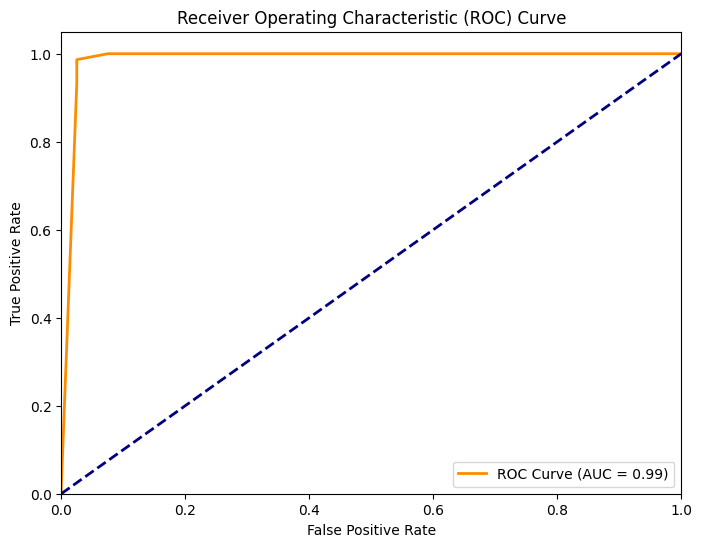

In [116]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, best_dt_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [117]:
# Grid search
clf_dt.fit(X_train, y_train)
print("Best Hyperparameters:")
print(clf_dt.best_params_)
print("Best Accuracy:", clf_dt.best_score_)

Best Hyperparameters:
{'max_depth': 6}
Best Accuracy: 0.9363258810743673


### K-NN

In [118]:
breast_cancer = load_breast_cancer()
knn_X = breast_cancer.data
knn_y = breast_cancer.target

In [119]:
# Normaliztion
X_knn_scaled = StandardScaler().fit_transform(knn_X)

# Initialize
param_grid_knn = {
    "n_neighbors": list(range(1, 31)),
    "weights": ["uniform", "distance"]}

knn_classifier = KNeighborsClassifier()

num_trials = 10
nested_knn_scores = np.zeros(num_trials)
confusion_knn = []
precision_knn = []
recall_knn = []
f1_scores_knn = []

In [120]:
## Nested CV
for i in range(num_trials):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=inner_cv)
    nested_score_knn = cross_val_score(clf_knn, X=X_knn_scaled, y=y, cv=outer_cv)
    nested_knn_scores[i] = np.mean(nested_score_knn)
    
    # Train the k-NN model on the full dataset with the best parameters
    best_knn_model = clf_knn.fit(X_knn_scaled, y)
    
    # Make predictions on a hold-out test set
    X_train, X_test, y_train, y_test = train_test_split(X_knn_scaled, y, test_size=0.2, random_state=i)
    y_pred = best_knn_model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_knn.append(cm)
    
    report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)
    print(f"Classification Report (Trial {i + 1}):\n{report}")
    
    if nested_knn_scores[i] > nested_score_knn.mean():
        print("Knn may be overfitting.")
    else:
        print("Knn is less likely to be overfitting.")
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision_knn.append(precision)
    recall_knn.append(recall)
    f1_scores_knn.append(f1)

Classification Report (Trial 1):
              precision    recall  f1-score   support

   malignant       1.00      0.96      0.98        47
      benign       0.97      1.00      0.99        67

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Knn is less likely to be overfitting.
Classification Report (Trial 2):
              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        42
      benign       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Knn is less likely to be overfitting.
Classification Report (Trial 3):
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        45
      benign       0.99      1.00      0.99        69

    acc

In [121]:
# Print the results    
mean_cm = np.mean(confusion_knn, axis=0)
mean_precision = np.mean(precision_knn)
mean_recall = np.mean(recall_knn)
mean_f1 = np.mean(f1_scores_knn)  # Calculate the mean f1-score
print("\nMean Confusion Matrix:")
print(mean_cm)
print("\nNested Cross-Validation Results for KNN:")
print("Mean Accuracy: {:.4f}".format(np.mean(nested_dt_scores)))
print(f"\nMean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Confusion Matrix:
[[41.6  2.2]
 [ 0.3 69.9]]

Nested Cross-Validation Results for KNN:
Mean Accuracy: 0.9271

Mean Precision: 0.9787
Mean Recall: 0.9781
Mean F1-Score: 0.9779


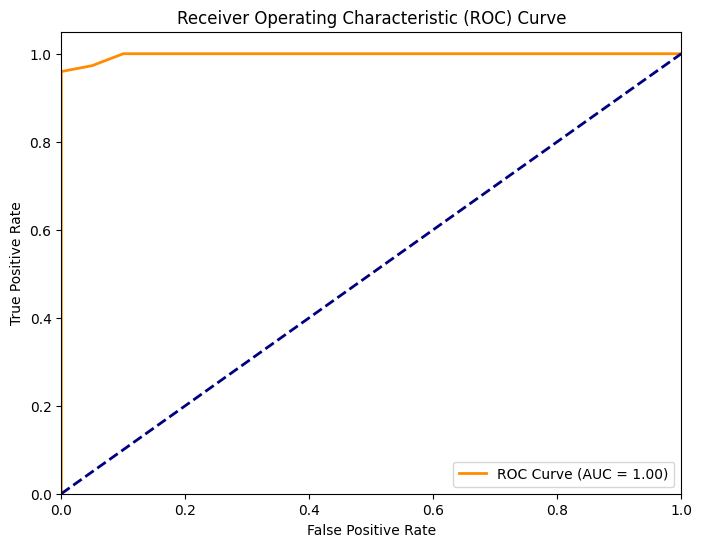

In [122]:
# Calculate ROC curve data
fpr, tpr, _ = roc_curve(y_test, best_knn_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [123]:
# Grid search
clf_knn.fit(X_train, y_train)
print("Best Hyperparameters:")
print(clf_knn.best_params_)
print("Best Accuracy:", clf_knn.best_score_)

Best Hyperparameters:
{'n_neighbors': 14, 'weights': 'uniform'}
Best Accuracy: 0.9692982456140351


### Logistic Regression

In [124]:
breast_cancer = load_breast_cancer()
X_lr = breast_cancer.data
y_lr = breast_cancer.target

X_scaled = StandardScaler().fit_transform(X_lr)

# Initialize logistic regression and hyperparameter grid
param_grid_logreg = {
    "C": np.logspace(-3, 3, 7),  # Adjust the range of C values as needed
    "penalty": ["l1", "l2"]}

logreg_classifier = LogisticRegression(max_iter=1000, solver='liblinear')
num_trials = 10
nested_logreg_scores = np.zeros(num_trials)
confusion_logreg = []
precision_logreg = []
recall_logreg = []
f1_scores_logreg = []

In [125]:
# Nested CV
for i in range(num_trials):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf_logreg = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid_logreg, cv=inner_cv)
    nested_score_logreg = cross_val_score(clf_logreg, X=X_scaled, y=y, cv=outer_cv)
    nested_logreg_scores[i] = np.mean(nested_score_logreg)

    # Train the Logistic Regression model on the full dataset with the best parameters
    best_logreg_model = clf_logreg.fit(X_scaled, y)

    # Make predictions on a hold-out test set
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    y_pred = best_logreg_model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_logreg.append(cm)

    report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)
    print(f"Classification Report (Trial {i + 1}):\n{report}")

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision_logreg.append(precision)
    recall_logreg.append(recall)
    f1_scores_logreg.append(f1)

Classification Report (Trial 1):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        47
      benign       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Classification Report (Trial 2):
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        42
      benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Classification Report (Trial 3):
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        45
      benign       0.99      1.00      0.99        69

    accuracy                           0.99       114
   macro avg       0.99      

In [126]:
# Print the results
mean_cm = np.mean(confusion_logreg, axis=0)
mean_precision = np.mean(precision_logreg)
mean_recall = np.mean(recall_logreg)
mean_f1 = np.mean(f1_scores_logreg)

print("\nMean Confusion Matrix:")
print(mean_cm)
print("\nNested Cross-Validation Results for Logistic Regression:")
print("Mean Accuracy: {:.4f}".format(np.mean(nested_logreg_scores)))
print(f"\nMean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Confusion Matrix:
[[42.5  1.3]
 [ 0.4 69.8]]

Nested Cross-Validation Results for Logistic Regression:
Mean Accuracy: 0.9773

Mean Precision: 0.9853
Mean Recall: 0.9851
Mean F1-Score: 0.9851


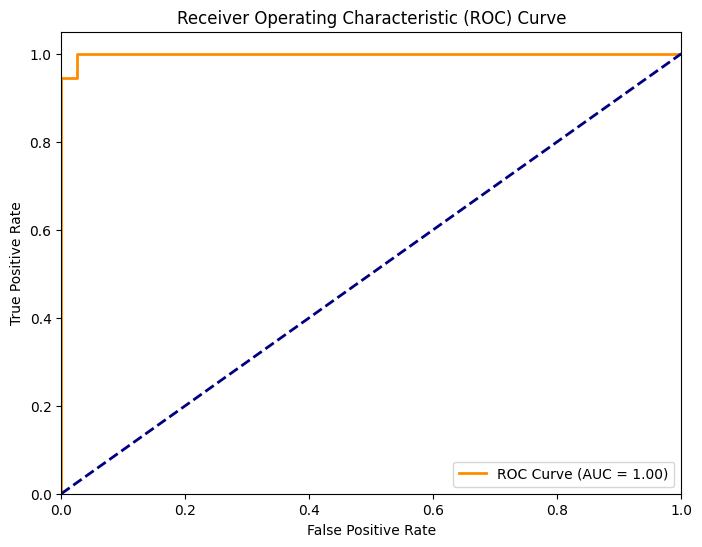

In [127]:
# Calculate ROC curve data
fpr, tpr, _ = roc_curve(y_test, best_logreg_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

/tmp/ipykernel_52293/4052493852.py:3: RuntimeWarning: invalid value encountered in divide
  lift_values = tpr / expected_tpr


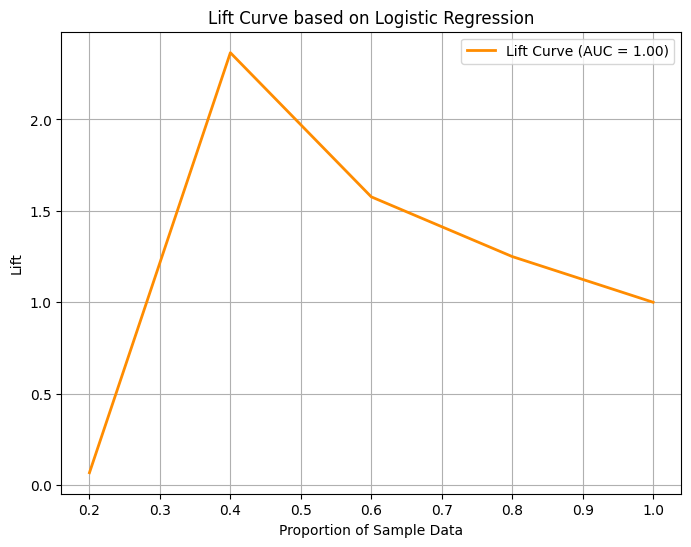

In [128]:
# Calculate the Lift values
expected_tpr = np.linspace(0, 1, len(fpr))
lift_values = tpr / expected_tpr

# Plot the Lift Curve
plt.figure(figsize=(8, 6))
plt.plot(expected_tpr, lift_values, color='darkorange', lw=2, label=f'Lift Curve (AUC = {roc_auc:.2f})')
plt.xlabel('Proportion of Sample Data')
plt.ylabel('Lift')
plt.title('Lift Curve based on Logistic Regression')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [129]:
# Grid search
clf_logreg.fit(X_train, y_train)
print("Best Hyperparameters:")
print(clf_logreg.best_params_)
print("Best Accuracy:", clf_logreg.best_score_)

Best Hyperparameters:
{'C': 0.1, 'penalty': 'l2'}
Best Accuracy: 0.9780701754385965


### SVM Model

In [135]:
breast_cancer = load_breast_cancer()
X_svm = breast_cancer.data
y_svm = breast_cancer.target

X_scaled = StandardScaler().fit_transform(X_svm)

param_grid_svm = {"C": [1, 10, 100], 
    "kernel": ["rbf"]}

svm_classifier = SVC(probability=True)

num_trials = 10
nested_svm_scores = np.zeros(num_trials)
confusion_svm = []
precision_svm = []
recall_svm = []
f1_scores_svm = []

In [136]:
# Nested CV
for i in range(num_trials):
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=inner_cv)
    nested_score_svm = cross_val_score(clf_svm, X=X_scaled, y=y, cv=outer_cv)
    nested_svm_scores[i] = np.mean(nested_score_svm)

    # Train the SVM model on the full dataset with the best parameters
    best_svm_model = clf_svm.fit(X_scaled, y)

    # Make predictions on a hold-out test set
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    y_pred = best_svm_model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_svm.append(cm)

    report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)
    print(f"Classification Report (Trial {i + 1}):\n{report}")

    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    precision_svm.append(precision)
    recall_svm.append(recall)
    f1_scores_svm.append(f1)

Classification Report (Trial 1):
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        47
      benign       0.99      1.00      0.99        67

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Classification Report (Trial 2):
              precision    recall  f1-score   support

   malignant       1.00      0.95      0.98        42
      benign       0.97      1.00      0.99        72

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Classification Report (Trial 3):
              precision    recall  f1-score   support

   malignant       1.00      0.98      0.99        45
      benign       0.99      1.00      0.99        69

    accuracy                           0.99       114
   macro avg       0.99      

In [137]:
# Print the results
mean_cm = np.mean(confusion_svm, axis=0)
mean_precision = np.mean(precision_svm)
mean_recall = np.mean(recall_svm)
mean_f1 = np.mean(f1_scores_svm)

print("\nMean Confusion Matrix:")
print(mean_cm)
print("\nNested Cross-Validation Results for SVM:")
print("Mean Accuracy: {:.4f}".format(np.mean(nested_svm_scores)))
print(f"\nMean Precision: {mean_precision:.4f}")
print(f"Mean Recall: {mean_recall:.4f}")
print(f"Mean F1-Score: {mean_f1:.4f}")


Mean Confusion Matrix:
[[42.4  1.4]
 [ 0.  70.2]]

Nested Cross-Validation Results for SVM:
Mean Accuracy: 0.9701

Mean Precision: 0.9880
Mean Recall: 0.9877
Mean F1-Score: 0.9877


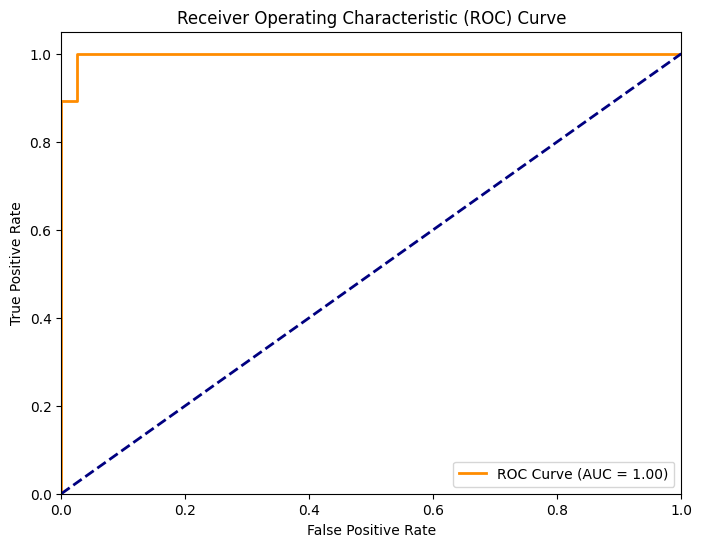

In [93]:
# Calculate ROC curve data
fpr, tpr, _ = roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [65]:
# Grid search
clf_svm.fit(X_train, y_train)
print("Best Hyperparameters:")
print(clf_svm.best_params_)
print("Best Accuracy:", clf_svm.best_score_)

Best Hyperparameters:
{'C': 1.0, 'kernel': 'linear'}
Best Accuracy: 0.9802243440459556
